In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime
sns.set()

In [26]:
current_dir: str = os.getcwd()
output_directory: str = os.path.join(current_dir, "output")
dsar_directory: str = os.path.join(output_directory, "dsar")
figures_directory: str = os.path.join(output_directory, "figures")

stations: list[str] = [
    'VG.PSAG.00.EHZ',
    'VG.TMKS.00.EHZ',
]

In [27]:
# Optional, you can ignore it.
# Only used in Indonesia.
# The default value is False
plot_from_magma: bool = False
magma_directory: str = os.path.join(output_directory, "magma")
magma_csv: str = 'magma_AGU_2017-10-01-2018-07-31.csv'
magma_df = pd.read_csv(os.path.join(magma_directory, magma_csv), 
                           index_col='date', parse_dates=True) if plot_from_magma else pd.DataFrame

In [28]:
# start date, end date of eruption
continous_eruptions: list[list[str]] = [
    ['2017-11-21', '2017-11-29'],
    ['2018-06-27', '2018-07-16'],
    ['2018-07-24', '2018-07-27'],
]

single_eruptions: list[str] = [
    '2017-11-25',
    '2017-11-26',
    '2017-11-27',
    '2017-11-29',
    '2017-12-08',
    '2017-12-09',
    '2017-12-10',
    '2017-12-11',
    '2017-12-12',
    '2017-12-23',
    '2017-12-24',
    '2017-12-26',
    '2017-12-28',
    '2018-01-01',
    '2018-01-03',
    '2018-01-11',
    '2018-01-15',
    '2018-01-17',
    '2018-01-18',
    '2018-01-19',
    '2018-01-20',
    '2018-01-22',
    '2018-01-23',
    '2018-01-24',
    '2018-02-13',
    '2018-03-11',
    '2018-03-26',
    '2018-04-06',
    '2018-04-15',
    '2018-04-30',
    '2018-05-19',
    '2018-05-29',
    '2018-06-10',
    '2018-06-13',
    '2018-06-15',
    '2018-06-27',
    '2018-07-02',
    '2018-07-03',
    '2018-07-04',
    '2018-07-05',
    '2018-07-06',
    '2018-07-08',
    '2018-07-09',
    '2018-07-11',
    '2018-07-13',
    '2018-07-15',
    '2018-07-16',
    '2018-07-21',
    '2018-07-24',
    '2018-07-25',
    '2018-07-27']

In [29]:
def get_nrows()-> int:
    if plot_from_magma:
        return len(stations)+len(magma_df.columns)
    return len(stations)

In [30]:
def merge_stations_and_eq_events() -> list[str]:
    if plot_from_magma:
        return magma_df.columns.tolist() + stations
    return stations

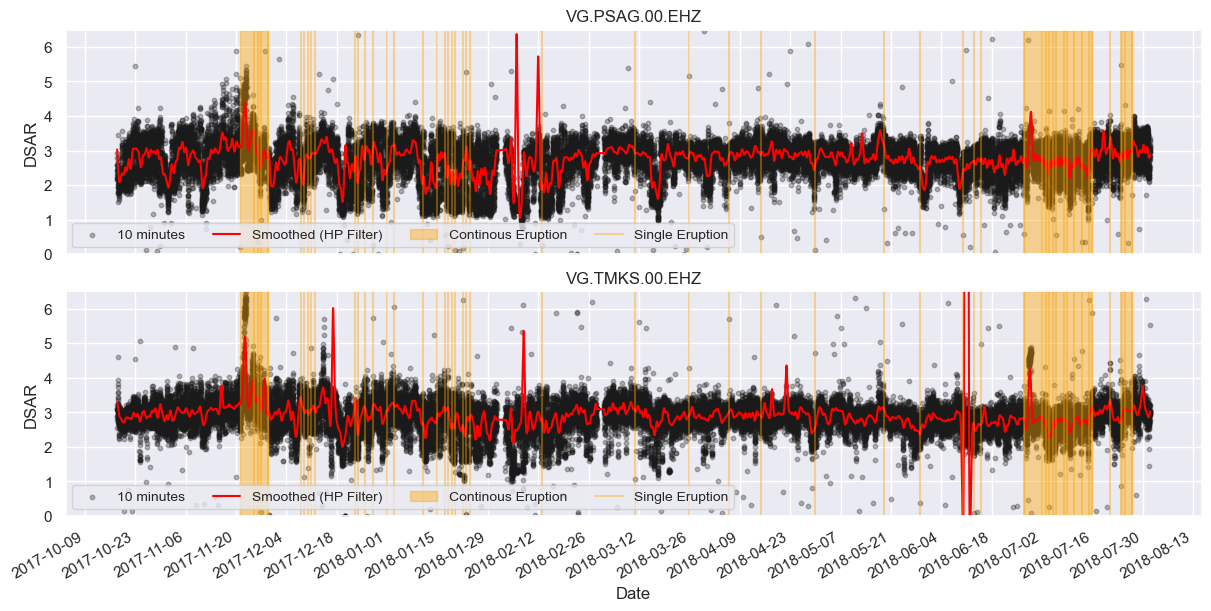

In [47]:
fig, axs = plt.subplots(nrows=get_nrows(), ncols=1, figsize=(12, 3*get_nrows()),
                        layout="constrained", sharex=True)

for index_key, station in enumerate(merge_stations_and_eq_events()):
    
    # (optional) Plotting VT events and eruptions from MAGMA Indonesia
    if plot_from_magma and index_key < len(magma_df.columns):
        axs[index_key].bar(magma_df.index, magma_df[station], width=0.5,label=station)
        
        axs[index_key].legend(loc='lower left')
        axs[index_key].set_ylabel('Jumlah')
            
        axs[index_key].xaxis.set_major_locator(mdates.DayLocator(interval=14))
    
    # Default plot
    else:
        df = pd.read_csv(os.path.join(dsar_directory, 'DSAR_{}.csv'.format(station)), 
                     index_col='datetime', parse_dates=True)

        # HP filter documentation https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html
        _,trend = hpfilter(df.DSAR, 1000000)
        axs[index_key].scatter(df.index, df.DSAR, c= 'k', alpha=0.3, s=10, label='10 minutes')
        axs[index_key].plot(df.index, trend, c='red', label='Smoothed (HP Filter)'.format(station), alpha=1)

        axs[index_key].set_title(station)
        axs[index_key].set_ylabel('DSAR')

        # Plot label only for the last subplot
        if index_key == (len(stations)-1):
            axs[index_key].set_xlabel('Date')

        axs[index_key].xaxis.set_major_locator(mdates.DayLocator(interval=14))
        axs[index_key].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        # Change your limit of DSAR value
        axs[index_key].set_ylim(0,6.5)
    
    # Plotting continous eruptions
    for key, continous in enumerate(continous_eruptions):
        # continous[0] = start date of eruption
        # continous[1] = end date of eruption 
        axs[index_key].axvspan(datetime.strptime(continous[0], '%Y-%m-%d'), 
                               datetime.strptime(continous[1], '%Y-%m-%d'), 
                               alpha=0.4, color='orange', label="_"*key+'Continous Eruption')
    
    # Plotting single eruptions
    for key, date in enumerate(single_eruptions):
        axs[index_key].axvline(datetime.strptime(date, '%Y-%m-%d'), 
                               alpha=0.4, color='orange', label =  "_"*key + 'Single Eruption')
    # Add legend    
    axs[index_key].legend(loc='lower left', fontsize='10', ncol=4)
    
    # Rotate x label
    for label in axs[index_key].get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')

In [48]:
fig.savefig(os.path.join(figures_directory, '{}.png'.format('test_plot')), dpi=300)